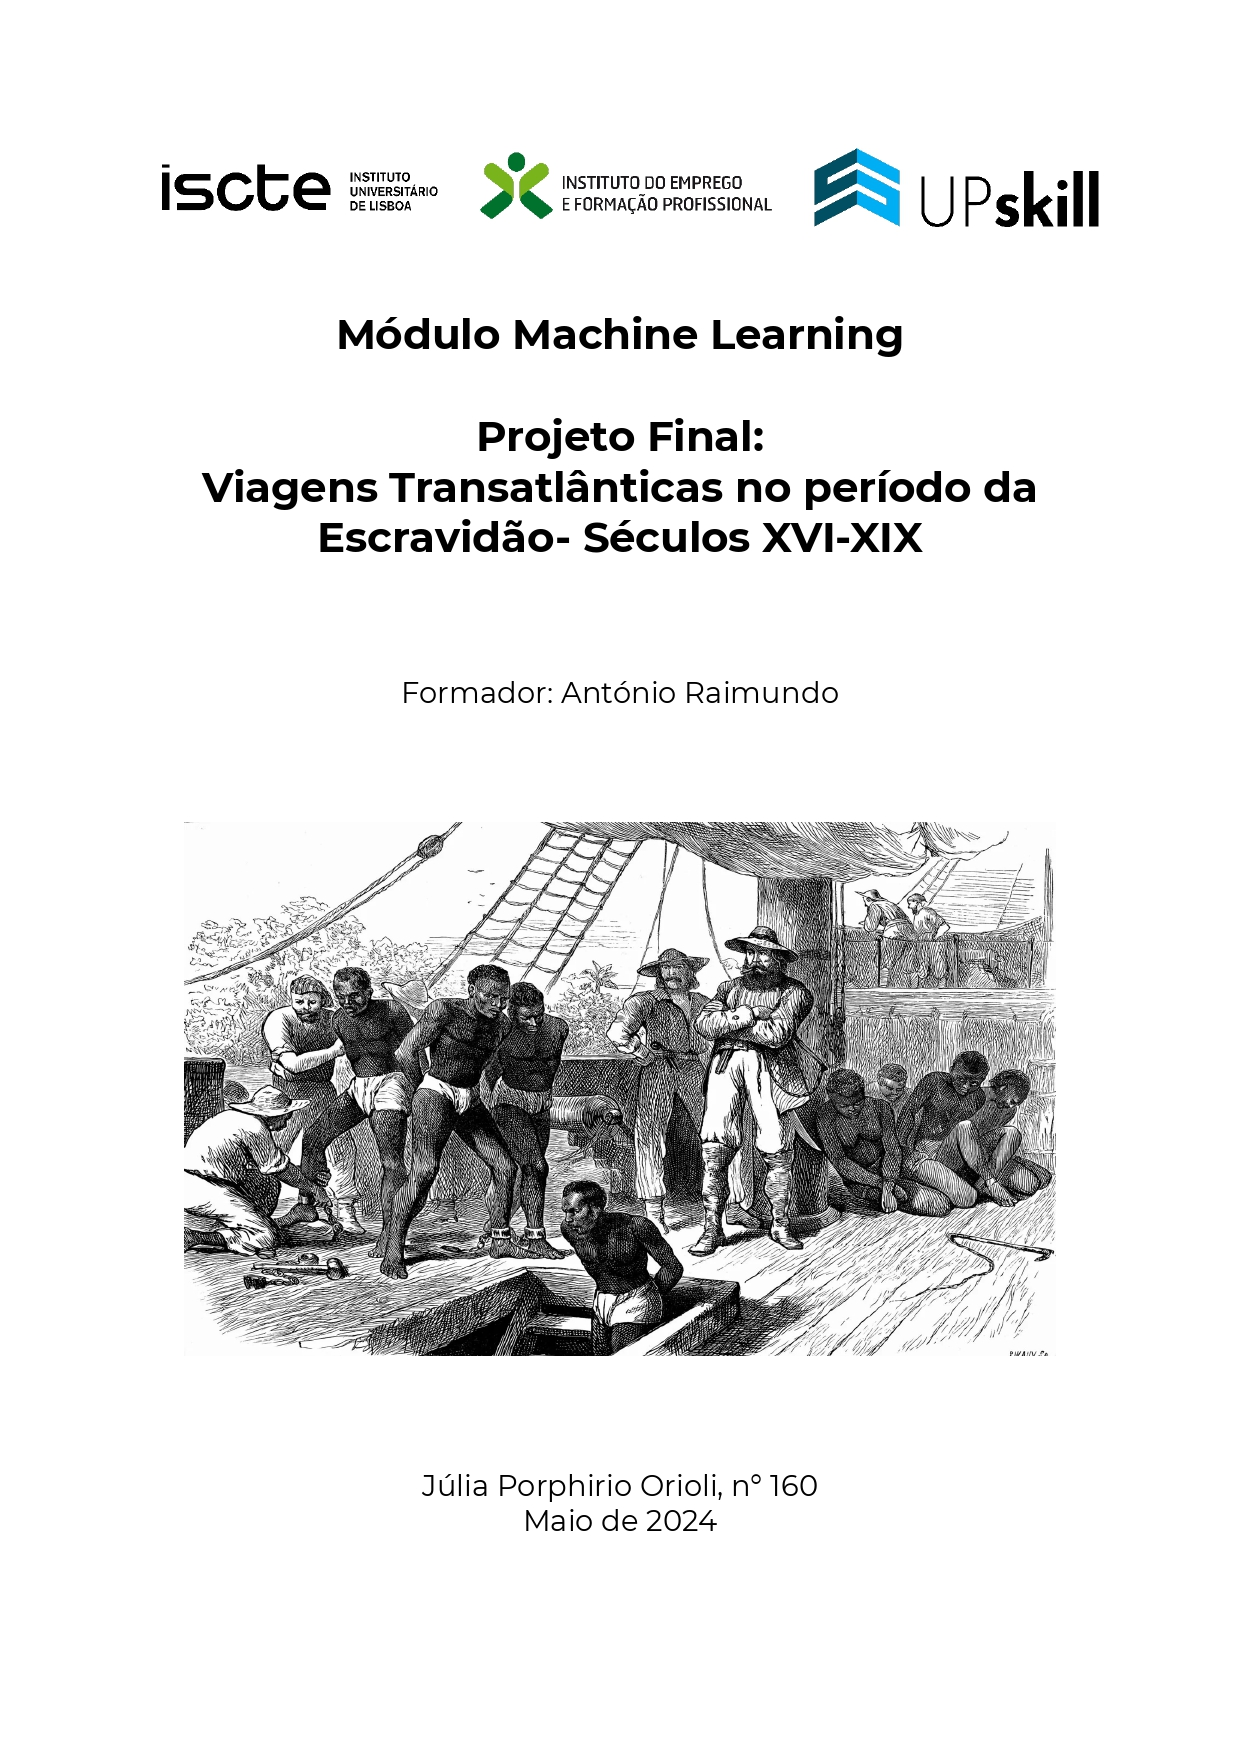

# 1. INTRODUÇÃO

## 1.1 Contextualização do Dataset
A partir das expansões marítimas, o globo alterou-se. O mundo ocidental passou a girar em torno do oceano Atlântico, onde as economias e culturas transformaram-se. O europeu, o americano e o africano ocuparam outros lugares além de seu continente de origem e disseminaram suas culturas pelo Mundo. Surgiu uma nova ordem ocidental gerida por uma economia mundial, ou seja, a produção deixou de ser local e espalhou-se, no sentido de complementaridade – uma localidade produzia uma mercadoria, outra uma diferente e essas seriam trocadas e espalhadas pelo globo, de tal maneira que sedas chinesas foram trocadas por escravizados no interior da África, escravizados foram trocados por ouro no Brasil, onde produziam o açúcar que era distribuído na Europa.

Segundo Curtin, em seu livro clássico *The Atlantic Slave Trade: a census*, em 1969, mais de 14 milhões de africanos foram escravizados, vendidos como mercadoria e comercializados em todo mundo, principalmente, atravessaram o Atlântico rumo as Américas. A partir desse trabalho, historiadores vem tentando encontrar um número, para saberem o tamanho dessa migração forçada em massa. Foi através desta busca para entender o tamanho e o volume do tráfico de escravizados que David Eltis iniciou em 1999 o projeto [Slave Voyages](https://www.slavevoyages.org/) , que atualmente tem contribuição de vários pesquisadores do mundo todo. 

O dataset utilizado neste trabalho foi retirado deste site, uma versão em csv produzida em 2010, nota-se que o esforço de produção de uma database sobre o comércio de escravizados no Atlântico, iniciou-se de um pesquisador inglês com outros pesquisadores anglofonos, ou seja, a maioria das fontes consultadas eram de escritas e de origem inglesa. Isso fez com que alguns resultados fossem diferentes dos esperados, como o principal porto ser o de liverpool, os africanos escravizados partiram de portos de influência inglesa. Porém já foi provado que o maior volume de comércio no Atlântico foram de comerciantes portugueses e brasileiros e nas regiões de influência portuguesa, nos portos brasileiros, o Rio de Janeiro e a Bahia. Mesmo com essa ênfase na língua inglesa, esse dataset é muito robusto e apresenta uma grande quantidade de possibilidades de análise.

## 1.2 Objetivo e Descrição do Dataset



O objetivo do projeto é analisar o dataset, saber o número de escravizados por século, ano e localidade, a probabilidade de mortes ao longo da viagem transatlântica, assim como se o navio concluiu sua viagem. Desenvolver modelos preditivos através da machine learning para prever o número de mortes de escravizados ao longo da viagem, e se o navio chegou ou não ao seu destino. 

O dataset foi retirado do projeto [Slave Voyages](https://www.slavevoyages.org/), que também disponibilizou um [Codebook](https://www.slavevoyages.org/voyage/downloads#full-versions-of-the-trans-atlantic-slave-trade-database/0/pt/) que explica todas as variavéis do dataset. Esse Dataset descreve viagens dos navios negreiros ou tumbeiros, chamados dessa segunda maneira por causa do número de mortes que ocorriam dentro deles e porque para os africanos atravessar o Atlântico era considerado a morte, eles chamavam a travessia de caminho da morte pois eram retirados de suas comunidades e nunca mais voltavam. Essas viagens ocorreram a partir do século 16 até o 19, de 1525 até 1864(ano em que a Inglaterra a já havia abolido a escravidão nas suas regiões de influência (1833) e que ela já havia proibido o comércio de escravizados no Atlântico (1845)), também tem as informações: do país de origem da embarcação, do tipo de embarcação, do dono, da origem do inicio da viagem, do local em que embarcaram os escravizados, do porto de chegada, do número de escravizados embarcados, do escravizados desembarcados, da documentação consultada, entre outras informações.  


**O trabalho vai ser dividido nas seguintes partes:**
1. Introdução
2. Data Wrangling - Limpeza e manipulação do dataset de forma a obter novas variáveis para poder analisar 
3. EDA - Análise exploratória dos dados  e a sua interpretação
4. Modelação preditiva - Criação de algoritmos de machine learning

# 2. Data Wrangling

Importação das bibliotecas que vamos utilizar.

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.tree import DecisionTreeClassifier, plot_tree #Decision Tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold 
from sklearn import metrics #accuracy measure
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
!pip install folium
!pip install mplcursors
!pip install tensorflow
!pip install keras_tuner
!pip install keras_tuner.tuners
import folium
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from keras_tuner import HyperModel
from keras_tuner.tuners import RandomSearch
from scipy.stats import randint
import mplcursors
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

ERROR: Could not find a version that satisfies the requirement keras_tuner.tuners (from versions: none)
ERROR: No matching distribution found for keras_tuner.tuners


 Importar o dataset. 

In [10]:
df = pd.read_csv("tastdb-2010.csv", encoding='latin-1', delimiter=',', header=0)
df.head()

voyageid evgreen         shipname national natinimp placcons yrcons  \
0         1       1  Pastora de Lima        4        6                   
1         2       1          Tibério                 6                   
2         3       1     Paquete Real                 6                   
3         4       1      Bom Caminho                 6                   
4         5       1       Benigretta                 6                   

  placreg yrreg rig  ... sourcei sourcej sourcek sourcel sourcem sourcen  \
0                40  ...                                                   
1                40  ...                                                   
2                40  ...                                                   
3                40  ...                                                   
4                25  ...                                                   

  sourceo sourcep sourceq sourcer  
0                                  
1                                  
2                                  
3                                  
4                                  

[5 rows x 98 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34941 entries, 0 to 34940
Data columns (total 98 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   voyageid      34941 non-null  int64 
 1   evgreen       34941 non-null  object
 2   shipname      34941 non-null  object
 3   national      34941 non-null  object
 4   natinimp      34941 non-null  object
 5   placcons      34941 non-null  object
 6   yrcons        34941 non-null  object
 7   placreg       34941 non-null  object
 8   yrreg         34941 non-null  object
 9   rig           34941 non-null  object
 10  tonnage       34941 non-null  object
 11  tonmod        34941 non-null  object
 12  guns          34941 non-null  object
 13  ownera        34941 non-null  object
 14  ownerb        34941 non-null  object
 15  ownerc        34941 non-null  object
 16  ownerd        34941 non-null  object
 17  ownere        34941 non-null  object
 18  ownerf        34941 non-null  object
 19  owne

Visualização do dataset, seu tamanho e informações. 

In [13]:
df.shape

(34941, 98)

Notei que não havia nulos mas muitos espaços em branco não contabilizados, transformei em nulos os espaços em branco que não eram contados como nulos.

In [15]:
df= df.replace(r'^\s*$', float('nan'), regex=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34941 entries, 0 to 34940
Data columns (total 98 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   voyageid      34941 non-null  int64 
 1   evgreen       26567 non-null  object
 2   shipname      33338 non-null  object
 3   national      25570 non-null  object
 4   natinimp      33275 non-null  object
 5   placcons      8881 non-null   object
 6   yrcons        6182 non-null   object
 7   placreg       7218 non-null   object
 8   yrreg         4508 non-null   object
 9   rig           22419 non-null  object
 10  tonnage       17591 non-null  object
 11  tonmod        16557 non-null  object
 12  guns          6110 non-null   object
 13  ownera        21019 non-null  object
 14  ownerb        7581 non-null   object
 15  ownerc        4063 non-null   object
 16  ownerd        2663 non-null   object
 17  ownere        1851 non-null   object
 18  ownerf        1297 non-null   object
 19  owne

Retirei todas as colunas que não eram relevantes para o projeto e outras que tinham muitos valores nulos. 

In [17]:
colunas_para_remover= ['ownerb', 'ownerc', 'ownerd', 'ownere', 'ownerf', 'ownerg', 'ownerh', 'owneri', 'ownerj', 'ownerk', 'ownerl', 'ownerm', 'ownern', 'ownero', 'ownerp', 'sourcea','sourceb','sourcec','sourced','sourcer', 'sourceq', 'sourcep', 'sourceo', 'sourcen','sourcem', 'sourcel', 'sourcek', 'sourcej','sourcei','sourceh', 'sourceg', 'sourcef','sourcee','adpsale2','captainc', 'captainb','crew3', 'ncar17', 'ncar15', 'slas39', 'slas36', 'slas32', 'jamcaspr', 'yrcons', 'yrreg', 'npafttra', 'guns', 'placcons', 'placreg','plac3tra', 'adpsale1', 'Date_buy', 'Date_leftAfr', 'Date_depam', 'voy2imp', 'captaina', 'crewdied', 'slintend', 'ncar13', 'tslavesd', 'shipname','ownera', 'resistance', 'menrat7', 'womrat7', 'boyrat7', 'malrat7', 'chilrat7', 'vymrtimp', 'vymrtrat', 'evgreen','plac2tra', 'girlrat7','crew1', 'fate4', 'fate3', 'fate2', 'voy1imp','national','tonmod', 'slaarriv', 'Date_land1', 'Date_end','Date_dep', 'tonnage','portret', 'rig','mjbyptimp', 'sla1port','voyageid'  ]
df= df.drop(columns= colunas_para_remover)
df_voyages= df.dropna()
df_voyages.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18178 entries, 0 to 34879
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   natinimp   18178 non-null  object
 1   fate       18178 non-null  object
 2   ptdepimp   18178 non-null  object
 3   plac1tra   18178 non-null  object
 4   mjslptimp  18178 non-null  object
 5   yearam     18178 non-null  int64 
 6   slaximp    18178 non-null  object
 7   slamimp    18178 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.2+ MB


Mudei o tipo dos valores que eram classificados como object e os transformei como números inteiros (int64) e renomeie as colunas de acordo com o codebook.

In [19]:
df_voyages = df_voyages.copy()
df_voyages['natinimp'] = df_voyages['natinimp'].astype(int)
df_voyages['fate'] = df_voyages['fate'].astype(int)
df_voyages['ptdepimp'] = df_voyages['ptdepimp'].astype(int)
df_voyages['plac1tra'] = df_voyages['plac1tra'].astype(int)
df_voyages['mjslptimp'] = df_voyages['mjslptimp'].astype(int)
df_voyages['yearam'] = df_voyages['yearam'].astype(int)
df_voyages['slaximp'] = df_voyages['slaximp'].astype(float)
df_voyages['slamimp'] = df_voyages['slamimp'].astype(float)
df_voyages = df_voyages.rename(columns={
    'natinimp': 'bandeira',
    'fate': 'destino',
    'ptdepimp': 'inicio_viagem',
    'plac1tra': 'porto_escravo',
    'mjslptimp': 'porto_desembarque',
    'yearam': 'ano',
    'slaximp': 'total_escravos_embarcados',
    'slamimp': 'total_escravos_desembarcados'
})
df_voyages['total_escravos_embarcados'] = df_voyages['total_escravos_embarcados'].round()
df_voyages['total_escravos_desembarcados'] = df_voyages['total_escravos_desembarcados'].round()
df_voyages['total_escravos_embarcados'] = df_voyages['total_escravos_embarcados'].astype(int)
df_voyages['total_escravos_desembarcados'] = df_voyages['total_escravos_desembarcados'].astype(int)
print(df_voyages.head())
print(df_voyages.info())

   bandeira  destino  inicio_viagem  porto_escravo  porto_desembarque   ano  \
0         6       49          50422          60820              50299  1817   
1         6        1          50299          60820              50299  1817   
2         6        1          50299          60711              50299  1817   
3         6       49          50299          60822              50299  1817   
4         6        1          50299          60711              50299  1817   

   total_escravos_embarcados  total_escravos_desembarcados  
0                        404                           290  
1                        246                           223  
2                        405                           350  
3                        381                           342  
4                        578                           516  
<class 'pandas.core.frame.DataFrame'>
Index: 18178 entries, 0 to 34879
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype

In [20]:
df_voyages.head()

bandeira  destino  inicio_viagem  porto_escravo  porto_desembarque   ano  \
0         6       49          50422          60820              50299  1817   
1         6        1          50299          60820              50299  1817   
2         6        1          50299          60711              50299  1817   
3         6       49          50299          60822              50299  1817   
4         6        1          50299          60711              50299  1817   

   total_escravos_embarcados  total_escravos_desembarcados  
0                        404                           290  
1                        246                           223  
2                        405                           350  
3                        381                           342  
4                        578                           516

In [21]:
df_voyages['ano'].describe()

count    18178.000000
mean      1771.640665
std         45.582029
min       1525.000000
25%       1749.000000
50%       1776.000000
75%       1803.000000
max       1864.000000
Name: ano, dtype: float64

In [22]:
df_voyages['ano'].max()

1864


 Agrupei os anos em séculos 16,17,18,19 e criei uma coluna com os séculos, para facilitar as análises dos dados. 

In [24]:
def agrupar_por_seculo(ano):
    if ano >= 1500 and ano < 1600:
        return '16'
    elif ano >= 1600 and ano < 1700:
        return '17'
    elif ano >= 1700 and ano < 1800:
        return '18'
    elif ano >= 1800 and ano < 1900:
        return '19'
    elif ano >= 1900 and ano < 2000:
        return '20'
    else:
        return 'Outro'
df_voyages['century'] = df_voyages['ano'].apply(agrupar_por_seculo)  
df_voyages['century'] = df_voyages['century'].astype(int)
df_voyages.head()

bandeira  destino  inicio_viagem  porto_escravo  porto_desembarque   ano  \
0         6       49          50422          60820              50299  1817   
1         6        1          50299          60820              50299  1817   
2         6        1          50299          60711              50299  1817   
3         6       49          50299          60822              50299  1817   
4         6        1          50299          60711              50299  1817   

   total_escravos_embarcados  total_escravos_desembarcados  century  
0                        404                           290       19  
1                        246                           223       19  
2                        405                           350       19  
3                        381                           342       19  
4                        578                           516       19

Criei uma nova coluna com a diferença de escravos embarcados e desembarcados, com o total de possíveis mortes. 

In [26]:
df_voyages['diferenca_emb_desemb'] = df_voyages['total_escravos_embarcados'] - df_voyages['total_escravos_desembarcados']
df_voyages.head()


bandeira  destino  inicio_viagem  porto_escravo  porto_desembarque   ano  \
0         6       49          50422          60820              50299  1817   
1         6        1          50299          60820              50299  1817   
2         6        1          50299          60711              50299  1817   
3         6       49          50299          60822              50299  1817   
4         6        1          50299          60711              50299  1817   

   total_escravos_embarcados  total_escravos_desembarcados  century  \
0                        404                           290       19   
1                        246                           223       19   
2                        405                           350       19   
3                        381                           342       19   
4                        578                           516       19   

   diferenca_emb_desemb  
0                   114  
1                    23  
2                    55  
3                    39  
4                    62

A coluna destino apresentava vários valores diferentes para descrever o motivo que a viagem não chegou ao seu destino como: apreensão, piratas, sumiu, entre outros. Para realizar a análise destes valores e transforma-la em uma target que é uma variável que se deseja prever ou explicar com o modelo de machine learning ou estatístico, eu simplifiquei esta coluna criando uma nova classificatória. Com o nome *chegada_destino* que classifica, de acordo com a coluna destino, se a embarcação chegou ou não ao seu destino, utilizando o valor 0 para quando não chegou e 1 se chegou. 

In [28]:
viagens_destino = df_voyages['destino'].value_counts().sort_index()
df_voyages['chegada_destino'] = df_voyages['destino'].apply(lambda x: 1 if x == 1 else 0)
df_voyages.head()

bandeira  destino  inicio_viagem  porto_escravo  porto_desembarque   ano  \
0         6       49          50422          60820              50299  1817   
1         6        1          50299          60820              50299  1817   
2         6        1          50299          60711              50299  1817   
3         6       49          50299          60822              50299  1817   
4         6        1          50299          60711              50299  1817   

   total_escravos_embarcados  total_escravos_desembarcados  century  \
0                        404                           290       19   
1                        246                           223       19   
2                        405                           350       19   
3                        381                           342       19   
4                        578                           516       19   

   diferenca_emb_desemb  chegada_destino  
0                   114                0  
1                    23                1  
2                    55                1  
3                    39                0  
4                    62                1

# 3. EDA - Análise exploratória dos dados e a sua interpretação

## 3.1 Análise dos dados por séculos

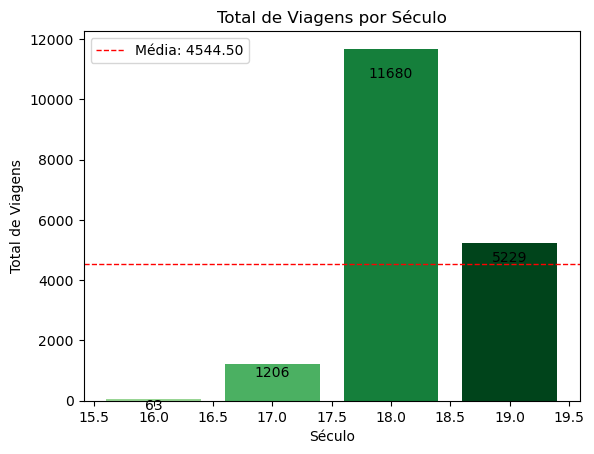

In [31]:
viagens_por_seculo = df_voyages['century'].value_counts().sort_index()

num_barras = len(viagens_por_seculo)
tons_de_verde = plt.cm.Greens(np.linspace(0.4, 1, num_barras))

plt.bar(viagens_por_seculo.index, viagens_por_seculo.values, color=tons_de_verde)
plt.xlabel('Século')
plt.ylabel('Total de Viagens')
plt.title('Total de Viagens por Século')

for i, valor in enumerate(viagens_por_seculo.values):
    plt.text(viagens_por_seculo.index[i], valor - (0.05 * valor if valor != 0 else 1), str(valor), ha='center', va='top', color='black')

media_viagens = viagens_por_seculo.mean()

plt.axhline(media_viagens, color='red', linestyle='dashed', linewidth=1, label=f'Média: {media_viagens:.2f}')
plt.legend()
plt.show()



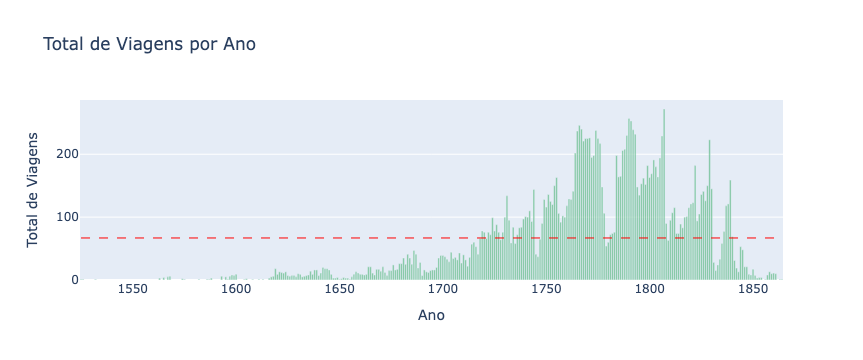

In [32]:
viagens_por_ano = df_voyages['ano'].value_counts().sort_index()
fig = go.Figure(data=[go.Bar(
    x=viagens_por_ano.index,
    y=viagens_por_ano.values,
    marker=dict(color='rgba(50, 171, 96, 0.6)'),
    hovertemplate='<b>Ano</b>: %{x}<br><b>Total de Viagens</b>: %{y}<extra></extra>'
)])

# Adicionando linha de média
media_viagens = viagens_por_ano.mean()
fig.add_shape(
    type="line",
    x0=min(viagens_por_ano.index),
    y0=media_viagens,
    x1=max(viagens_por_ano.index),
    y1=media_viagens,
    line=dict(color="red", width=1, dash="dash"),
    name=f'Média: {media_viagens:.2f}'
)

# Personalizando layout
fig.update_layout(
    title="Total de Viagens por Ano",
    xaxis_title="Ano",
    yaxis_title="Total de Viagens",
)

# Exibindo o gráfico
fig.show()


*Podemos passar o cursor em cima das barras para ver os valores e os anos que ela correspondem*

Estes dois histogramas demonstram o número de viagens ao longo dos séculos e anos, nota-se que o pico das viagens de navios negreiros foi na metade do século 17 até o meio do 18, séculos em que se intensificou a exploração das Américas e África, a queda da quantidade no século 19 justifica-se que a última data dos registros é 1864, pela abolição da escravidão dos países de influência inglesa e a proibição do comércio de escravizados. Mesmo com a proibição do comércio de escravizados no Atlântico decretada, a escravidão africana permaneceu legalizada em inúmeros países sendo Cuba (1886) e o Brasil (1888) os últimos a abolirem a escravidão *africana*. No entanto, até 2007 a Arabia Saudita e a Mauritânia ainda tinham regimes de escravidão em vigor. 
Ao analisarmos os anos vemos que ao invés de crescer exponencialmente até o século 19, ocorre momentos de pico e queda. Isso se deve a demandas especificas de regiões que compravams escravizados, como lacunas na documentação consultada.  

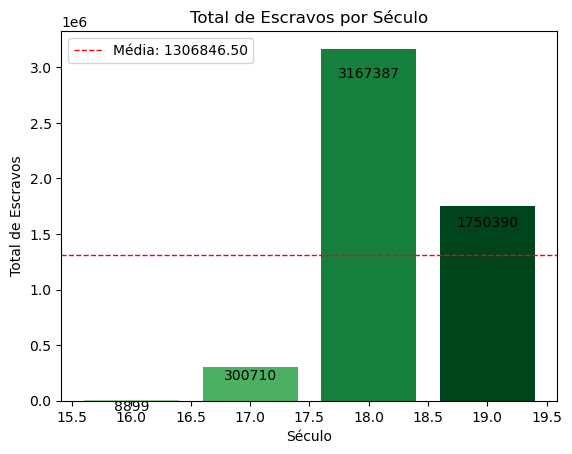

In [35]:
total_escravos_por_seculo = df_voyages.groupby('century')['total_escravos_desembarcados'].sum()
num_barras = len(total_escravos_por_seculo)
tons_de_verde = plt.cm.Greens(np.linspace(0.4, 1, num_barras))

plt.bar(total_escravos_por_seculo.index, total_escravos_por_seculo.values, color=tons_de_verde)
plt.xlabel('Século')
plt.ylabel('Total de Escravos')
plt.title('Total de Escravos por Século')

for i, valor in enumerate(total_escravos_por_seculo.values):
    plt.text(total_escravos_por_seculo.index[i], valor - (0.05 * valor if valor != 0 else 1), str(valor), ha='center', va='top', color='black')

media_escravos = total_escravos_por_seculo.mean()
plt.axhline(media_escravos, color='red', linestyle='dashed', linewidth=1, label=f'Média: {media_escravos:.2f}')
plt.legend()
plt.show()


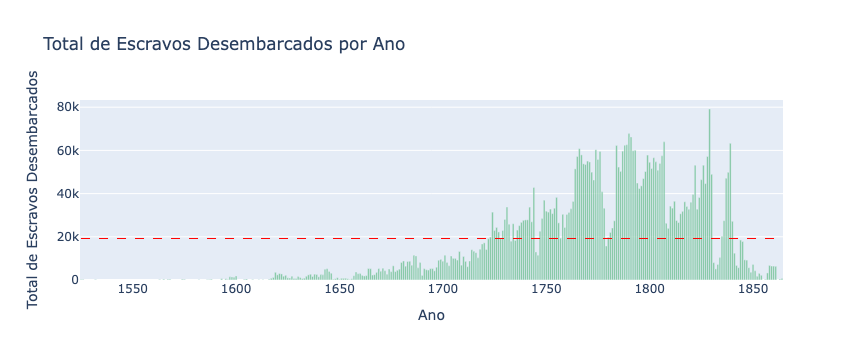

In [36]:
import plotly.graph_objects as go

total_escravos_perda = df_voyages.groupby('ano')['total_escravos_desembarcados'].sum()
media_escravos = total_escravos_perda.mean()

fig = go.Figure(data=[go.Bar(
    x=total_escravos_perda.index,
    y=total_escravos_perda.values,
    marker=dict(color='rgba(50, 171, 96, 0.6)'),
    hovertemplate='<b>Ano</b>: %{x}<br><b>Total de Escravos</b>: %{y}<extra></extra>')])
fig.add_shape(
    type="line",
    x0=min(total_escravos_perda.index),
    y0=media_escravos,
    x1=max(total_escravos_perda.index),
    y1=media_escravos,
    line=dict(color="red", width=1, dash="dash"),
    name=f'Média: {media_escravos:.2f}')

fig.update_layout(
    title="Total de Escravos Desembarcados por Ano",
    xaxis_title="Ano",
    yaxis_title="Total de Escravos Desembarcados",)
fig.show()

*Podemos passar o cursor em cima das barras para ver os valores e os anos que ela correspondem*

Nota-se a mesma tendência do gráfico acima, o número total de escravizados desembarcados é maior entre a metade do século 17 e até a metade do século 18, pelos mesmos motivos explicitados. Também podemos ver que a média passa de um milhão de escravizados tendo o pico do século 18 de 3 milhões, este dataset é uma amostra de um volume muito maior, pois devemos somar as regiões de influência portuguesa que está pouco contabilizada, assim como o tráfico extraoficial, que era feito sem registro.  
Na avaliação por ano, nota-se que a momentos de pico e outros em que diminui o números de escravos. 

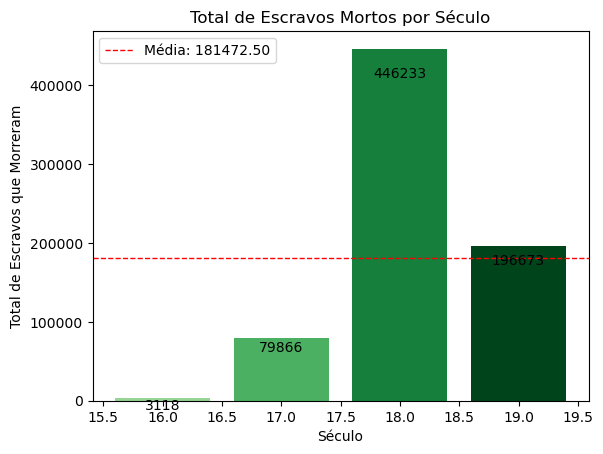

In [39]:
total_escravos_perda = df_voyages.groupby('century')['diferenca_emb_desemb'].sum()
num_barras = len(total_escravos_perda)
tons_de_verde = plt.cm.Greens(np.linspace(0.4, 1, num_barras))

plt.bar(total_escravos_perda.index, total_escravos_perda.values, color=tons_de_verde)
plt.xlabel('Século')
plt.ylabel('Total de Escravos que Morreram')
plt.title('Total de Escravos Mortos por Século')

for i, valor in enumerate(total_escravos_perda.values):
    plt.text(total_escravos_perda.index[i], valor - (0.05 * valor if valor != 0 else 1), str(valor), ha='center', va='top', color='black')

media_escravos = total_escravos_perda.mean()
plt.axhline(media_escravos, color='red', linestyle='dashed', linewidth=1, label=f'Média: {media_escravos:.2f}')
plt.legend()
plt.show()

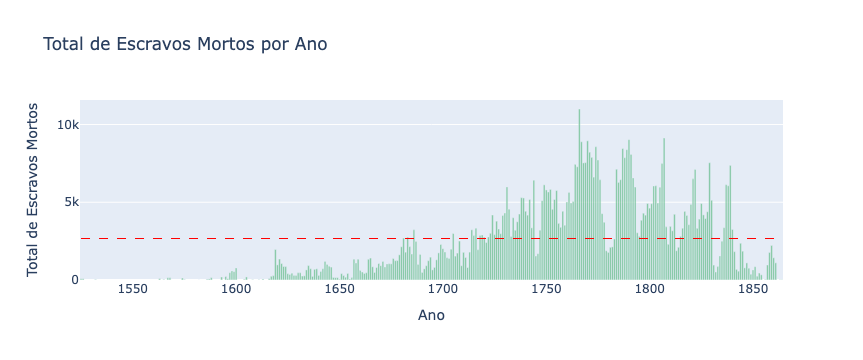

In [40]:
total_escravos_perda = df_voyages.groupby('ano')['diferenca_emb_desemb'].sum()
media_escravos = total_escravos_perda.mean()

fig = go.Figure(data=[go.Bar(
    x=total_escravos_perda.index,
    y=total_escravos_perda.values,
    marker=dict(color='rgba(50, 171, 96, 0.6)'),
    hovertemplate='<b>Ano</b>: %{x}<br><b>Total de Escravos Mortos</b>: %{y}<extra></extra>')])

fig.add_shape(
    type="line",
    x0=min(total_escravos_perda.index),
    y0=media_escravos,
    x1=max(total_escravos_perda.index),
    y1=media_escravos,
    line=dict(color="red", width=1, dash="dash"),
    name=f'Média: {media_escravos:.2f}')

fig.update_layout(
    title="Total de Escravos Mortos por Ano",
    xaxis_title="Ano",
    yaxis_title="Total de Escravos Mortos")

fig.show()


*Podemos passar o cursor em cima das barras para ver os valores e os anos que ela correspondem*

In [42]:
print(total_escravos_perda.idxmax())
print(total_escravos_perda.max())

1766
10996


Nesses últimos dados ve-se o número de mortes de escravizados ao longo da viagem, fazendo a diferença entre número de embarcados e desembarcados. Notamos que o ano que teve mais perda ao longo da viagem foi em 1766, com 10996, diferente do ano em que ocorreram mais viagem 1807 e que tiveram mais desembarcados 1829. 

## 3.2 Análise da quantidade de viagens por região: mapeando os caminhos dos tumbeiros

In [45]:
total_flags= df_voyages['bandeira'].value_counts().head(7)

total_flags = total_flags.reset_index()
total_flags.columns = ['bandeira', 'total navios']  
nation_flags = { 7: 'Great Britain',
                   6 : 'Portugal', 
                   10: 'France',
                   8: 'Netherlands', 
                   9: 'U.S.A.',
                   3: 'Spain',
                   15: 'Denmark'
                    }
total_flags['bandeira'] = total_flags['bandeira'].map(nation_flags)

total_flags

bandeira  total navios
0  Great Britain          6711
1       Portugal          6504
2         France          2839
3    Netherlands          1097
4         U.S.A.           670
5          Spain           309
6        Denmark            45

Acima temos as quantidades de navios por bandeira, ou seja, aonde estes navios foram registrados. Nota-se que a Grã Bretanha tem o maior número de navios registrados, logo depois Portugal e com uma diferença muito grande a França. Estes dados mostram a predominância dos dois paises no comércio de escravizados e de produtos no Atlântico. 

In [47]:
total_inicio_viagem= df_voyages['inicio_viagem'].value_counts().head(5)

total_inicio_viagem = total_inicio_viagem.reset_index()
total_inicio_viagem.columns = ['city_id', 'count']  # Renomeando as colunas
city_map_inicio = { 10432: 'Liverpool',
                   50422: 'Rio de Janeiro', 
                   50299: 'Bahia',
                   10433: 'Londres', 
                   10720: 'Nantes'}
total_inicio_viagem['inicio_viagem_city'] = total_inicio_viagem['city_id'].map(city_map_inicio)

total_inicio_viagem


city_id  count inicio_viagem_city
0    10432   3344          Liverpool
1    50422   2774     Rio de Janeiro
2    50299   2219              Bahia
3    10433   1856            Londres
4    10720   1316             Nantes

Nesta tabela temos a quantidade de embarcações e os cinco maiores portos em que iniciaram a viagem, ou seja, onde sairam as embarcações, como já foi explicitado, esse dataset é de origem inglesa e a maioria da documentação consultada era da mesma língua, por esse motivo a maioria das viagens se iniciam em Liverpool, uma cidade que não era o maior porto da época, Rio de Janeiro, tem o segundo maior fluxo de saida de embarcações, principalmente a partir da segunda metade do século XVIII quando a cidade brasileira passou a ser uns dos grandes centros de comércio de escravizados no Atlântico Sul. 

Abaixo temos o mapa com a localidade e uma tooltip com o número de viagens que sairam de cada porto. 

In [49]:

city_coordinates = {
    'Liverpool': (53.4084, -2.9916),
    'Rio de Janeiro': (-22.9068, -43.1729),
    'Bahia': (-12.9714, -38.5014),
    'Londres': (51.5074, -0.1278),
    'Nantes': (47.2184, -1.5536)
}

colors = ['lightgreen', 'green']

max_count = total_inicio_viagem['count'].max()
min_count = total_inicio_viagem['count'].min()

mapa = folium.Map(location=[0, 0], zoom_start=2)

for city, count in zip(total_inicio_viagem['inicio_viagem_city'], total_inicio_viagem['count']):
    color_index = int((count - min_count) / (max_count - min_count) * (len(colors) - 1))
    folium.CircleMarker(
        location=city_coordinates.get(city),
        radius=5,  
        color=colors[color_index],
        fill=True,
        fill_color=colors[color_index],
        fill_opacity=0.7,
        tooltip=f'Cidade: {city}, Viagens: {count}'
    ).add_to(mapa)

mapa

In [50]:
total_viagens_por_pais = df_voyages['porto_escravo'].value_counts().head(8)
total_viagens_por_pais = total_viagens_por_pais.reset_index()
total_viagens_por_pais.columns = ['city_id', 'count']  # Renomeando as colunas
city_map_inicio = { 60799: 'Africa Central',
                   60734: 'Luanda', 
                   60605: 'Benin',
                   60515: 'Uida', 
                   60502: 'Costa da Mina',
                   60608: 'Calabar',
                   60711: 'Cabinda' ,
                   60707: 'Benguela'}
total_viagens_por_pais['cidade_escravos'] = total_viagens_por_pais['city_id'].map(city_map_inicio)

total_viagens_por_pais

city_id  count cidade_escravos
0    60799   1961  Africa Central
1    60734   1599          Luanda
2    60605   1086           Benin
3    60515    812            Uida
4    60502    781   Costa da Mina
5    60608    778         Calabar
6    60711    761         Cabinda
7    60707    673        Benguela

Nesta segunda tabela, temos o segundo porto visitado nas viagens dos navios negreiros, esse porto servia para carregar o navio com escravos, por isso todas as regiões destacadas acima são regiões do continente africano. Os navios saiam dos portos na Europa ou Américas, rumo a África para comprar escravizados e venderem. Nota-se que os principais portos são da região da África Central Ocidental e África Central, e três deles Luanda, Benguela e Cabinda são portos da região de Angola totalizando mais de 3000 viagens. 

Abaixo temos o mapa indicando as localidades em que ocorriam as trocas por escravos e também uma tooltip com a quantidade de viagens que sairam dos portos africanos.

In [52]:
country_coordinates = {
    'Africa Central': (-8.8391, 13.2894),
    'Luanda': (-8.8391, 13.2894),
    'Benin': (9.3077, 2.3158),
    'Uida': (7.0116, 2.0936),
    'Costa da Mina': (5.6037, -0.186964),
    'Calabar': (4.9588, 8.3269),
    'Cabinda': (-5.5557, 12.1875),
    'Benguela': (-12.5797, 13.4072)
}

colors = ['lightcoral', 'red']

max_count = total_viagens_por_pais['count'].max()
min_count = total_viagens_por_pais['count'].min()

mapa_origem = folium.Map(location=[0, 0], zoom_start=2)

for country, count in zip(total_viagens_por_pais['cidade_escravos'], total_viagens_por_pais['count']):
    coordinates = country_coordinates.get(country)
    if coordinates:
        color_index = int((count - min_count) / (max_count - min_count) * (len(colors) - 1))
        folium.CircleMarker(
            location=coordinates,
            radius=5,  
            color=colors[color_index],
            fill=True,
            fill_color=colors[color_index],
            fill_opacity=0.7,
            tooltip=f'Cidade: {country}, Viagens: {count}'
        ).add_to(mapa_origem)
    else:
        print(f"Warning: No coordinates found for {country}")

mapa_origem


In [53]:
total_viagens_por_desembarque = df_voyages['porto_desembarque'].value_counts().head(8)
total_viagens_por_desembarque = total_viagens_por_desembarque.reset_index()
total_viagens_por_desembarque.columns = ['city_id', 'count']  
city_map_inicio = { 50422: 'Rio de Janeiro',
                   50299: 'Bahia', 
                   35114: 'Jamaica',
                   36403: 'Cap Français', 
                   34299: 'Barbados',
                   35199: 'Kingston',
                   50399: 'Pernambuco' ,
                   32240: 'Suriname'}
total_viagens_por_desembarque['cidade_desembarque'] = total_viagens_por_desembarque['city_id'].map(city_map_inicio)
total_viagens_por_desembarque

city_id  count cidade_desembarque
0    50422   2457     Rio de Janeiro
1    50299   2144              Bahia
2    35114   1212            Jamaica
3    36403   1010       Cap Français
4    34299    969           Barbados
5    35199    930           Kingston
6    50399    813         Pernambuco
7    32240    608           Suriname

Por último os portos de desembarque dos escravizados, podemos notar que o Brasil foi o principal comprador de escravizados, com o Rio de Janeiro, Bahia e Pernambuco, totalizando 5414 desembarques. Jamaica é o segundo destino, com Jamaica e Kingston totalizando 2142.

Abaixo temos o mapa indicando as localidades em que oos escravos seriam vendidos, o destino final do navio e também uma tooltip com a quantidade de viagens que chegaram nos portos das Américas.

In [55]:

city_coordinates = {
    'Rio de Janeiro': (-22.9068, -43.1729),
    'Bahia': (-12.9714, -38.5014),
    'Jamaica': (18.1096, -77.2975),
    'Cap Français': (19.7563, -72.1953),
    'Barbados': (13.1939, -59.5432),
    'Kingston': (17.9710, -76.7922),
    'Pernambuco': (-8.0476, -34.8770),
    'Suriname': (5.8252, -55.1679)
}

colors = ['lightcoral', 'red']


max_count = total_viagens_por_desembarque['count'].max()
min_count = total_viagens_por_desembarque['count'].min()
mapa_desembarque = folium.Map(location=[0, 0], zoom_start=2)

for city, count in zip(total_viagens_por_desembarque['cidade_desembarque'], total_viagens_por_desembarque['count']):
    color_index = int((count - min_count) / (max_count - min_count) * (len(colors) - 1))
    folium.CircleMarker(
        location=city_coordinates.get(city),
        radius=5,  
        color=colors[color_index],
        fill=True,
        fill_color=colors[color_index],
        fill_opacity=0.7,
        tooltip=f'Cidade: {city}, Viagens: {count}'
    ).add_to(mapa_desembarque)

mapa_desembarque

## 3.3 Análise de Chegada ao Destino 

In [57]:
df_voyages['chegada_destino'].value_counts()


chegada_destino
1    11950
0     6228
Name: count, dtype: int64

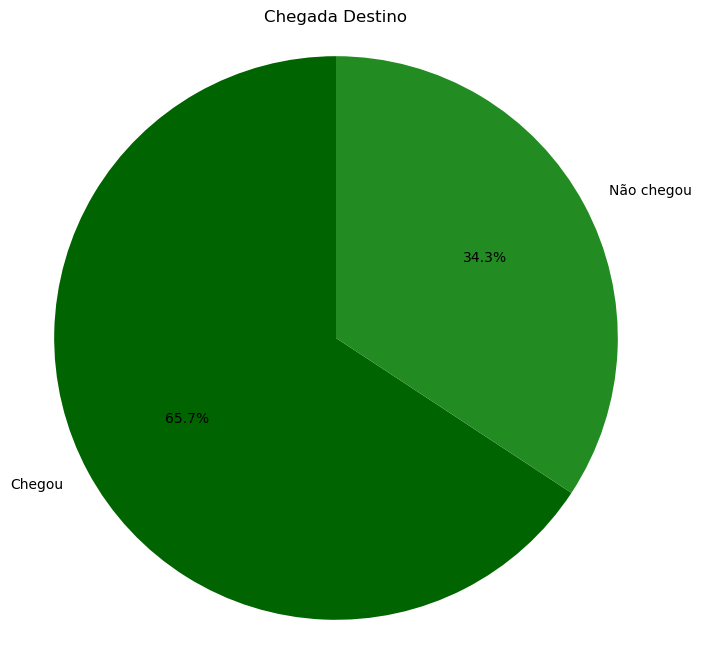

In [58]:
value_counts = df_voyages['chegada_destino'].value_counts()


labels = ['Chegou', 'Não chegou']
sizes = value_counts.values
colors = ['#006400', '#228B22']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Chegada Destino')
plt.axis('equal') 

plt.show()

No gráfico acima notamos que a maioria dos navios chegaram ao destino mas com uma perda de 34% de viagens que não chegaram ao seu destino. Naquela época havia vários motivos para um navio não chegar, afundar, pirataria, interceptado por outros navios, mudava a rota, entre outros. 

# 4. Modelação preditiva - Criação de algoritmos de Machine Learning

### Elaboração do headmap para entender as features e suas correlações 

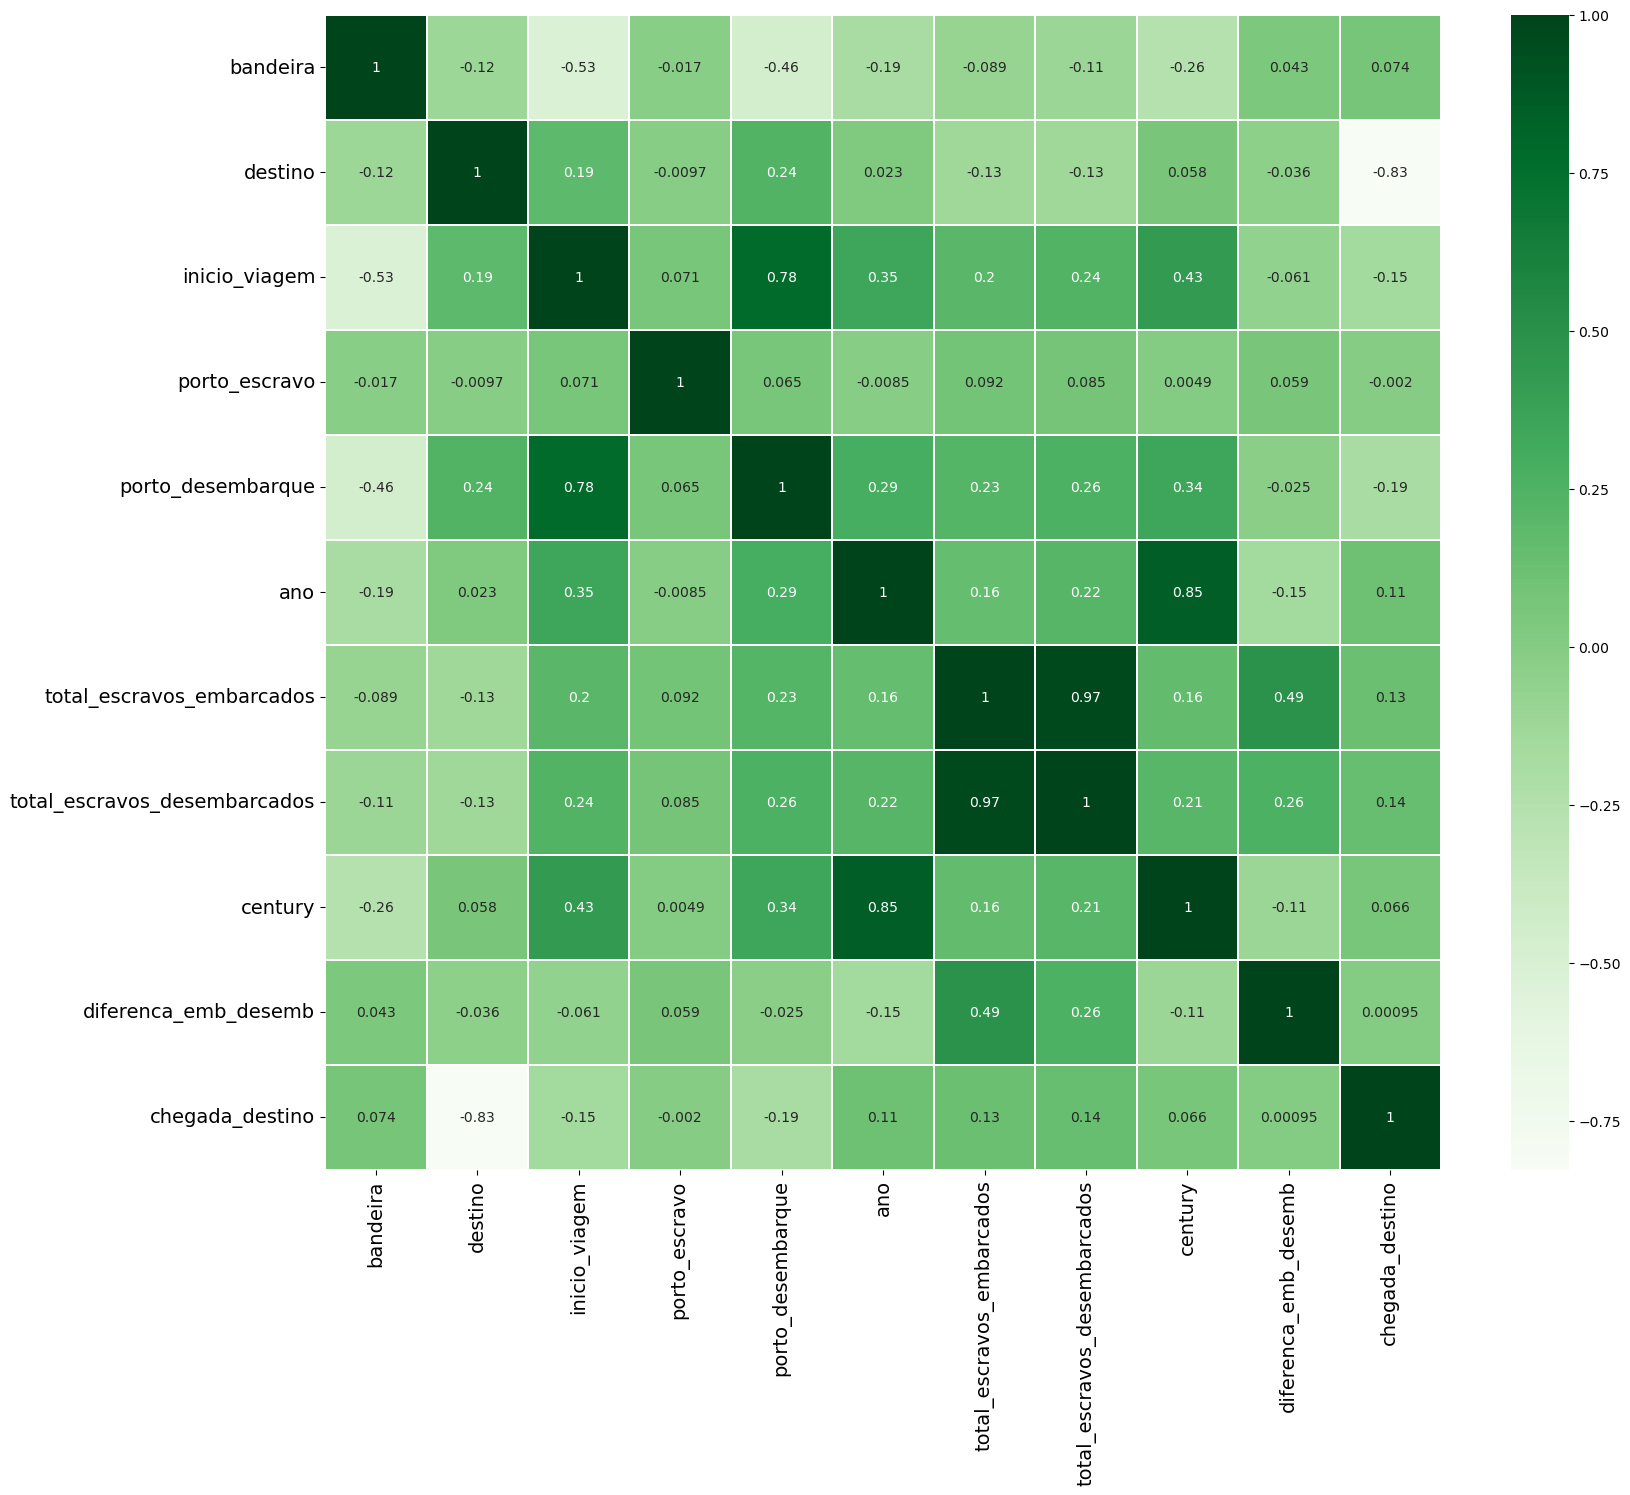

In [62]:
sns.heatmap(df_voyages.corr(),annot=True,cmap='Greens',linewidths=0.2,annot_kws={'size':10},xticklabels=True, yticklabels=True)
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Neste headmap podemos ver a relação entre as features, quanto mais próximo do 1 maior a relação entre elas, p caso utilize uma feature de target com uma relação muito próxima pode causar redundância, devemos escolher uma outra com um bom valor de correlação mas que não seja 1. Por exemplo, fortes correlações que poderiam ser utilizadas, entre a quantidade de escravos embarcados e desembarcados, é uma relação muito próxima, tendo em vista que uma feature depende da outra. Também notamos a relação *ano* e o *century*. 

No headmap, vemos um valor diferente do esperado, a coluna *chegada_destino* foi criada a partir da *destino* mas ao colocarmos no headmap aparece essa correlação negativa devido a diferença numérica dos valores, considerando que  a *destino* tem valores até 50 e a outra é 1 e 0, a correlação ficou negativa. No entanto, mesmo sendo negativa tem uma correlação alta devido ao 0.83, o negativo está demonstrando é que eles são inversamente proporcionais, ao criar a coluna *chegada_destino* o valor 1 sempre indicou que o navio chegou e todos os outros foram colocados no 0, os valores subiam mas ainda tornaram-se 0, diminuiram, por isso a relação inversa. 

### Train and Test para as questões de natureza classificatória 

Realizei a separação dos datasets, em X e y, neste primeiro momento realizei a separação para os modelos preditivos classificatórios, nota-se que retirei no X as colunas *chegada_destino*, a target, e retirei a *destino* porque eu criei a primeira coluna baseada na última, portanto, ao colocar no modelo preditivo a coluna *destino* gerava overfitting pois estas tem uma relação direta, era como se a máquina entedesse a relação, a regra que utilizei para a criação e espiasse a resposta através da coluna *destino*.  

In [66]:
X = df_voyages.drop(['chegada_destino', 'destino'], axis = 'columns')
print(X.info())
y = df_voyages['chegada_destino']
print(y.info())

<class 'pandas.core.frame.DataFrame'>
Index: 18178 entries, 0 to 34879
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   bandeira                      18178 non-null  int64
 1   inicio_viagem                 18178 non-null  int64
 2   porto_escravo                 18178 non-null  int64
 3   porto_desembarque             18178 non-null  int64
 4   ano                           18178 non-null  int64
 5   total_escravos_embarcados     18178 non-null  int64
 6   total_escravos_desembarcados  18178 non-null  int64
 7   century                       18178 non-null  int64
 8   diferenca_emb_desemb          18178 non-null  int64
dtypes: int64(9)
memory usage: 1.4 MB
None
<class 'pandas.core.series.Series'>
Index: 18178 entries, 0 to 34879
Series name: chegada_destino
Non-Null Count  Dtype
--------------  -----
18178 non-null  int64
dtypes: int64(1)
memory usage: 284.0 KB
None


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 1)
y_test.value_counts()

chegada_destino
1    2390
0    1246
Name: count, dtype: int64

Temos a quantidade do y_test, dividi o dataset em 80% de treino e 20% de teste com stratify, este último parametro se utiliza em questões de natureza classificatória.

In [70]:
print ('The size of our training "X" (input features - X_train) is', X_train.shape)
print ('The size of our testing "X" (input features - X_test) is', X_test.shape)
print ('The size of our training "y" (output feature - Y_train) is', y_train.shape)
print ('The size of our testing "y" (output features - Y_test) is', y_test.shape)

The size of our training "X" (input features - X_train) is (14542, 9)
The size of our testing "X" (input features - X_test) is (3636, 9)
The size of our training "y" (output feature - Y_train) is (14542,)
The size of our testing "y" (output features - Y_test) is (3636,)


## 4.1 Learning Machine Supervisionada Classificatória: modelo preditivo se o navio chegou ou não ao seu destino final
### 4.1.1 Decision Trees

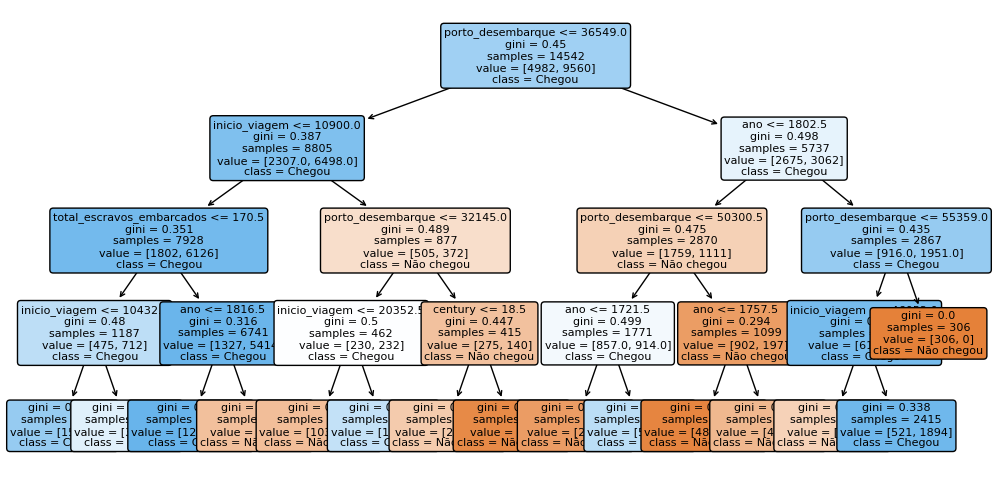

In [72]:
dt_algorithm = DecisionTreeClassifier(max_depth=4, random_state=1)
dt_model = dt_algorithm.fit(X_train, y_train)

features = list(X_train.columns.values)  # Ensure you're using the correct dataframe
classes = ["Não chegou", "Chegou"]

plt.figure(figsize=(12,6))
plot_tree(dt_model,
          feature_names=features,
          class_names=classes,
          fontsize=8, 
          filled=True, 
          rounded=True)
plt.show()

In [73]:
y_pred = dt_model.predict(X_test)

In [74]:
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
confusion= pd.DataFrame(cm, index=['Não chegou', 'Chegou'],
                         columns=['Não chegou','Chegou'])
confusion

Não chegou  Chegou
Não chegou         496     750
Chegou             157    2233

In [75]:
cl_tree= classification_report(y_test, y_pred)
print(cl_tree)

              precision    recall  f1-score   support

           0       0.76      0.40      0.52      1246
           1       0.75      0.93      0.83      2390

    accuracy                           0.75      3636
   macro avg       0.75      0.67      0.68      3636
weighted avg       0.75      0.75      0.73      3636



Text(0.5, 23.52222222222222, 'Predicted label')

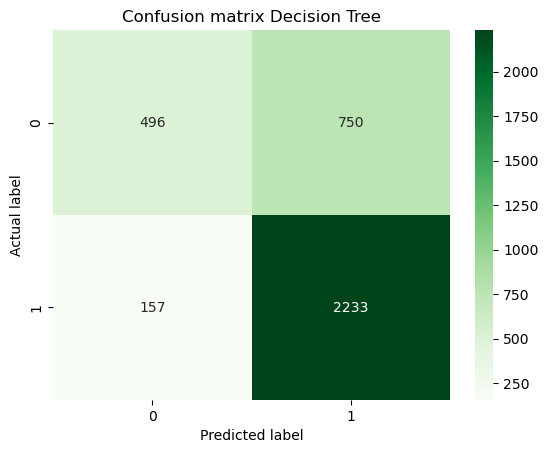

In [76]:
p = sns.heatmap(cm, annot=True, cmap="Greens" ,fmt='g')
plt.title('Confusion matrix Decision Tree')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Ao alterar os hiperparametros, consegui uma accuracy de 75 na Decision Tree. Ou seja, ao prever se umnavio chegará ou não em seu destino, a decision tree pode acertar 75% das respostas, e ao analisarmos se vai ou não chegar, tem uma precisão próxima de 76 para não e 75 para sim. 

### 4.1.2 Random Forest

In [80]:
sc_clf = MinMaxScaler()
X_train = sc_clf.fit_transform(X_train)
X_test = sc_clf.fit_transform(X_test)

In [81]:
algo_clf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=1)
model_clf = algo_clf.fit(X_train, y_train)

In [82]:
y_pred2 = model_clf.predict(X_test)

In [83]:
cm = confusion_matrix(y_test, y_pred2, labels=[0,1])
confusion = pd.DataFrame(cm, index=['Não chegou', 'Chegou'],
                         columns=['Não chegou','Chegou'])
confusion

Não chegou  Chegou
Não chegou         484     762
Chegou             164    2226

In [84]:
cl_randomc= classification_report(y_test, y_pred2)
print(cl_randomc)

              precision    recall  f1-score   support

           0       0.75      0.39      0.51      1246
           1       0.74      0.93      0.83      2390

    accuracy                           0.75      3636
   macro avg       0.75      0.66      0.67      3636
weighted avg       0.75      0.75      0.72      3636



Text(0.5, 23.52222222222222, 'Predicted label')

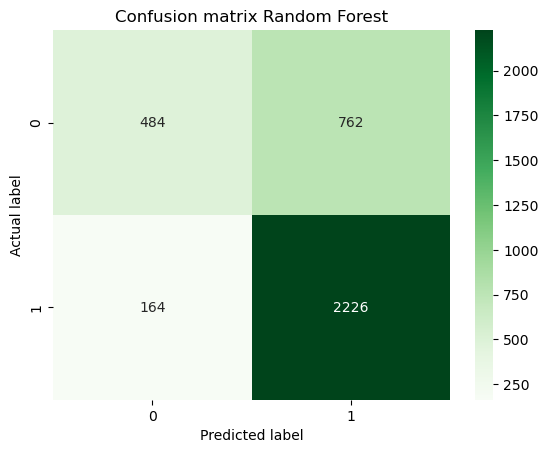

In [85]:
p = sns.heatmap(cm, annot=True, cmap="Greens" ,fmt='g')
plt.title('Confusion matrix Random Forest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

A Random Forest teve a mesma precisão da Decision Tree, com menos precisão se chegaria ao destino, no entanto, a optimização dos parâmetros foi feita manualmente, o que pode levar a números mais baixos. a seguir faremos uma optimização dos hiperparâmetros que controlam o processo do treinamento e são ajustados antes do processo. 

#### 4.1.2.1 Optimização do Random Forest

In [88]:
X, y = make_classification(n_samples=1000, n_features=9, n_classes=2, random_state=42)

param_distributions = {
    'n_estimators': np.random.randint(2, 400, 100),  
    'max_depth': np.random.randint(1, 40, 100),       
    'bootstrap': [True, False],
    'criterion': ["gini", "entropy"]
}
rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions,
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)
print("Best mean Cross-validation Accuracy score: ", round(random_search.best_score_, 3))

best_rf_model = RandomForestClassifier(**random_search.best_params_, random_state=42)


best_rf_model.fit(X_train, y_train)

y_pred = best_rf_model.predict(X_test)

cl_randomcop= classification_report(y_test, y_pred)
print("Classification Report:\n", cl_randomcop)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, criterion=gini, max_depth=7, n_estimators=397; total time=   2.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=28, n_estimators=25; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=32, n_estimators=159; total time=   2.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=30, n_estimators=339; total time=   5.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, n_estimators=354; total time=   5.5s
[CV] END bootstrap=True, criterion=gini, max_depth=27, n_estimators=170; total time=   2.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=32, n_estimators=215; total time=   5.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=16, n_estimators=200; total time=   2.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=16, n_estimators=200; total time=   2.9s
[CV] END bootstrap=False, criterion=gini, max_depth=21, n_estimators=359; total time=   7.3s

Com a optimização dos hiperparâmetros chegaram a uma accuracy de 63, para prevermos se um navio que não estava na documentação poderia ou não chegar ao seu destino com os dados fornecidos. 

### 4.1.3 SVM 

In [91]:
svc_algo = SVC(gamma="auto", kernel="rbf", C=10)
model = svc_algo.fit(X_train, y_train)
y_predict1 = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predict1))
cl_svmk= classification_report(y_test, y_predict1)
print(cl_svmk)

Accuracy: 0.6647414741474147
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      1246
           1       0.75      0.74      0.74      2390

    accuracy                           0.66      3636
   macro avg       0.63      0.63      0.63      3636
weighted avg       0.67      0.66      0.66      3636



In [92]:
svc_algo_linear = SVC(gamma="auto", kernel="linear", C=20)
model = svc_algo_linear.fit(X_train, y_train)
y_predict2 = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predict2))
cl_svml= classification_report(y_test, y_predict2)
print(cl_svml)

Accuracy: 0.6688668866886689
              precision    recall  f1-score   support

           0       0.94      0.04      0.07      1246
           1       0.67      1.00      0.80      2390

    accuracy                           0.67      3636
   macro avg       0.80      0.52      0.43      3636
weighted avg       0.76      0.67      0.55      3636



In [93]:
svc_algo_poly = SVC(gamma="auto", kernel="poly", C=20)
model = svc_algo_poly.fit(X_train, y_train)
y_predict3 = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predict3))
cl_svmp= classification_report(y_test, y_predict3)
print(cl_svmp)

Accuracy: 0.7134213421342134
              precision    recall  f1-score   support

           0       0.68      0.31      0.42      1246
           1       0.72      0.92      0.81      2390

    accuracy                           0.71      3636
   macro avg       0.70      0.62      0.62      3636
weighted avg       0.71      0.71      0.68      3636



O SVM também teve uma accuracy muito boa em todas as mudanças de Kernel, que é uma função essencial para o funcionamento do SVM, ele acrescenta dimensões mais altas para tornar possível separar os dados que não são linearmente separáveis no espaço original. Notamos que o Kernel com maior accuracy foi o poly. 

### 4.1.4 Redes Neuronais

In [96]:
print(X_train.shape)

(14542, 9)


In [97]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 


ann = Sequential() 

input_layer = Dense(units = 9, activation = 'relu', input_dim = 9) 
ann.add(input_layer)

hidden_layer_1 = Dense(units = 9, activation = 'relu')
ann.add(hidden_layer_1)
ann.add(Dense(units = 8, activation = 'relu'))
ann.add(Dense(units = 4, activation = 'relu'))

ann.add(Dense(units = 1, activation = 'sigmoid'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

history = ann.fit(X_train, y_train, batch_size=100, epochs=200, verbose=1, validation_split=0.2)

Epoch 1/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.6383 - loss: 0.6829 - val_accuracy: 0.6734 - val_loss: 0.6496
Epoch 2/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.6798 - loss: 0.6392 - val_accuracy: 0.7040 - val_loss: 0.6077
Epoch 3/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.7047 - loss: 0.5961 - val_accuracy: 0.7095 - val_loss: 0.5900
Epoch 4/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.7090 - loss: 0.5856 - val_accuracy: 0.7068 - val_loss: 0.5878
Epoch 5/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - accuracy: 0.7182 - loss: 0.5738 - val_accuracy: 0.7102 - val_loss: 0.5854
Epoch 6/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - accuracy: 0.7214 - loss: 0.5724 - val_accuracy: 0.7071 - val_loss: 0.5845
Epoch 7/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.7085 - loss: 0.5817 - val_accuracy: 0.7112 - val_loss: 0.5834
Epoch 8/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.7197 - loss: 0

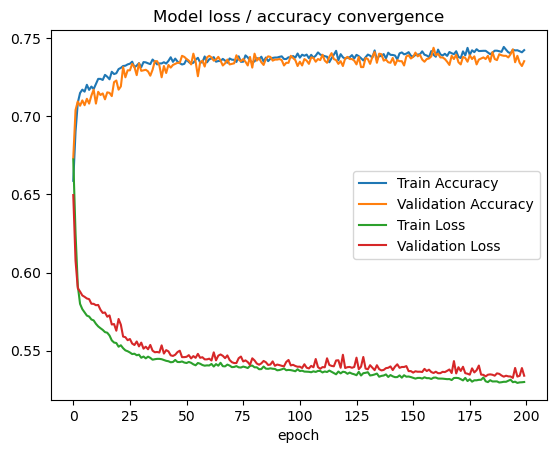

In [98]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss / accuracy convergence')
plt.xlabel('epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy', "Train Loss", "Validation Loss"], loc='center right')
plt.show()

In [99]:
score, acc = ann.evaluate(X_train, y_train, batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5).astype("int32")

print('*'*20)
score, acc = ann.evaluate(X_test, y_test, batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)
cm4 = confusion_matrix(y_test, y_pred)


1455/1455 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - accuracy: 0.7399 - loss: 0.5250
Train score: 0.5290042757987976
Train accuracy: 0.7393068075180054
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step
********************
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step - accuracy: 0.4489 - loss: 1.8467
Test score: 1.8555104732513428
Test accuracy: 0.44471946358680725


In [100]:
cl_ann= classification_report(y_test, y_pred)
print(cl_ann)

              precision    recall  f1-score   support

           0       0.36      0.76      0.49      1246
           1       0.69      0.28      0.40      2390

    accuracy                           0.44      3636
   macro avg       0.52      0.52      0.44      3636
weighted avg       0.58      0.44      0.43      3636



Text(0.5, 23.52222222222222, 'Predicted label')

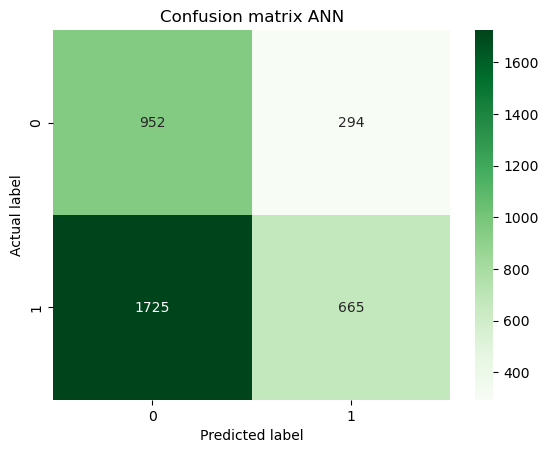

In [101]:
p = sns.heatmap(cm4, annot=True, cmap="Greens" ,fmt='g')
plt.title('Confusion matrix ANN')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### 4.1.4.1 Optimização Redes Neuronais

In [103]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class MyHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Dense(units=hp.Int('units', min_value=8, max_value=128, step=8),
                        activation='relu', input_dim=X_train.shape[1]))
        model.add(Dense(units=hp.Int('units', min_value=8, max_value=128, step=8), activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        
        optimizer = hp.Choice('optimizer', values=['adam', 'sgd'])
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        return model

hypermodel = MyHyperModel()
tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=10, 
    executions_per_trial=2, 
    directory='my_dir',
    project_name='helloworld'
)

tuner.search(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

eval_result = model.evaluate(X_test, y_test)
print(f'\nTest accuracy: {eval_result[1]}')


Reloading Tuner from my_dir/helloworld/tuner0.json
Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6627 - loss: 0.6407 - val_accuracy: 0.7125 - val_loss: 0.6107
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.7229 - loss: 0.6126 - val_accuracy: 0.7437 - val_loss: 0.5831
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.7738 - loss: 0.5749 - val_accuracy: 0.7688 - val_loss: 0.5589
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.7658 - loss: 0.5758 - val_accuracy: 0.8188 - val_loss: 0.5370
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.7844 - loss: 0.5468 - val_accuracy: 0.8375 - val_loss: 0.5170
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.7897 - loss: 0.5408 - val_accuracy: 0.8500 - val_loss: 0.4986
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.8095 - loss: 0.5098 - val_accuracy: 0.8500 - val_loss: 0.4816
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - a

In [104]:
print(f"\nBest Hyperparameters:")
print(f"Units: {best_hps.get('units')}")
print(f"Optimizer: {best_hps.get('optimizer')}")


Best Hyperparameters:
Units: 128
Optimizer: sgd


In [105]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ann = Sequential() 

input_layer = Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1])  # Units alterado para 128
ann.add(input_layer)

hidden_layer_1 = Dense(units=128, activation='relu')  # Units alterado para 128
ann.add(hidden_layer_1)

ann.add(Dense(units=128, activation='relu'))  # Units alterado para 128
ann.add(Dense(units=64, activation='relu'))  # Units alterado para 64

output_layer = Dense(units=1, activation='sigmoid')
ann.add(output_layer)

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = ann.fit(X_train_scaled, y_train, batch_size=10, epochs=200, verbose=1, validation_split=0.2)


Epoch 1/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5511 - loss: 0.6775 - val_accuracy: 0.6625 - val_loss: 0.5437
Epoch 2/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.7824 - loss: 0.4650 - val_accuracy: 0.8625 - val_loss: 0.2919
Epoch 3/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.8434 - loss: 0.3920 - val_accuracy: 0.8062 - val_loss: 0.4044
Epoch 4/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.8760 - loss: 0.3444 - val_accuracy: 0.8875 - val_loss: 0.3127
Epoch 5/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.8334 - loss: 0.3777 - val_accuracy: 0.8875 - val_loss: 0.2589
Epoch 6/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.8798 - loss: 0.3407 - val_accuracy: 0.8687 - val_loss: 0.3061
Epoch 7/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.8406 - loss: 0.3976 - val_accuracy: 0.8813 - val_loss: 0.2539
Epoch 8/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.8897 - loss: 0.3257 - val_accura

In [106]:
score, acc = ann.evaluate(X_train, y_train, batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

y_pred_ann_o = ann.predict(X_test)
y_pred_ann_o = (y_pred_ann_o > 0.5).astype("int32")

print('*'*20)
score, acc = ann.evaluate(X_test, y_test, batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

cm4 = confusion_matrix(y_test, y_pred_ann_o)
cm

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - accuracy: 0.9098 - loss: 6.0949
Train score: 7.801071643829346
Train accuracy: 0.8887500166893005
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
********************
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - accuracy: 0.8566 - loss: 11.4419
Test score: 12.357587814331055
Test accuracy: 0.8600000143051147


array([[ 484,  762],
       [ 164, 2226]])

In [107]:
cl_annop= classification_report(y_test, y_pred_ann_o)
print(cl_annop)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        93
           1       0.87      0.87      0.87       107

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



Com a optimização ocorreu uma melhora significativa dos parametros, das redes neuronais. 

## 4.2 Learning Machine Supervisionada de Regressão: o problema das mortes na viagem
### 4.2.1 Regressão Linear

Agora, iremos fazer um modelo preditivo que prevê quantos escravizados morreriam numa viagem, primeiro usando a regressão linear simples só com o parametro do total de embarcados comparando com a diferença de embarcados e desembarcados, ou seja, o número de mortos em uma viagem. 

Primeiro fiz o código para a regressão linear mas achei que poderia melhorar com modelos mais complexos.

In [112]:
X = df_voyages[['total_escravos_embarcados']].values
y = df_voyages.diferenca_emb_desemb

In [113]:
linreg = LinearRegression()
model = linreg.fit(X, y) 

print(model.intercept_)
print(model.coef_[0])

-1.0575550427035125
0.12516037146039669


In [114]:
y_true = y
y_pred = linreg.predict(X)

mae_lg= metrics.mean_absolute_error(y_true, y_pred)
mse_lg= metrics.mean_squared_error(y_true, y_pred)
rmse_lg = np.sqrt(mse_lg)
r2_lg = r2_score(y, y_pred)

print('Mean Absolute Error: ', mae_lg)
print('Mean Squared Error: ', mse_lg)
print('Root Mean Squared Error: ', rmse_lg)
print("R-squared (R²):", r2_lg)

Mean Absolute Error:  20.30948003912879
Mean Squared Error:  1254.094628070928
Root Mean Squared Error:  35.413198500995755
R-squared (R²): 0.23916544034784104


O MAE me indica a média da diferença entre a previsão e os valores reais, ou seja, ele vai me mostrar quanto de erro o modelo pode ter ao fazer uma previsão.O MSE indica essa varaição ao quadrado, é uma métrica mais sensível a outliers. O RMSE indica o mesmo que o MSE mas com valores quantitativos, e o R2 explica o quanto o modelo se adapta aos dados. 

Aqui temos um MAE de 20, o que é muito alto, isso significa que o erro pode estar em 20 escravos, ou seja, ao prever o valor de 100 podemos ter uma variação de 20 para cima ou para baixo. 

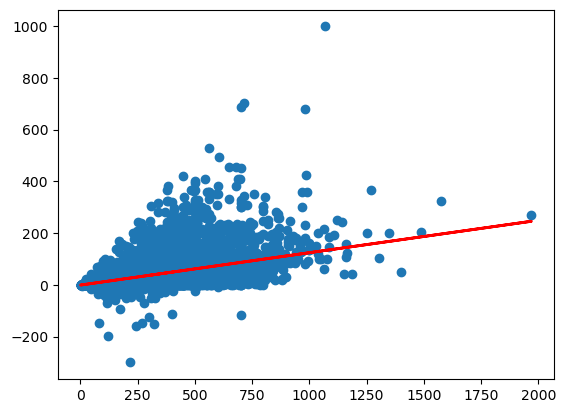

In [116]:
preds = model.predict(X)
plt.scatter(X, y)
plt.plot(X, preds, c='red', linewidth=2)

In [117]:
y_pred = model.predict([[1000], [200]])
y_pred

array([124.10281642,  23.97451925])

Acima fizemos uma previsão, em 1000 escravizados embarcados 124 podem falecer ao longo da viagem, em 200 poderiam 23. Um número alto, nos navios negreiros as mortes poderiam ser doenças como cólera, sarna, leptospirose (transmitidas por ratos), gripe, desnutrição, sede, lepra. Algumas vezes eles poderiam ser jogados ao mar quando a viagem durava mais e precisavam racionar alimentos e água.  

### 4.2.2 Regressão Multilinear

A Regressão Multilinear demonstrou mais precisão nas suas previsões, tendo um MAE de 1.5.

In [122]:
X = df_voyages.drop(['diferenca_emb_desemb'], axis = 'columns')
y = df_voyages['diferenca_emb_desemb']


In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [124]:

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae_rm = mean_absolute_error(y_test, y_pred)
mse_rm = mean_squared_error(y_test, y_pred)
rmse_rm = np.sqrt(mse_rm)
r2_rm = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae_rm)
print("Mean Squared Error (MSE):", mse_rm)
print("Root Mean Squared Error (RMSE):", rmse_rm)
print("R-squared (R²):", r2_rm)

Mean Absolute Error (MAE): 1.500114726105955e-13
Mean Squared Error (MSE): 4.969198358741703e-26
Root Mean Squared Error (RMSE): 2.2291698810861641e-13
R-squared (R²): 1.0


In [125]:
print(model.intercept_)
print(model.coef_[0])

4.831690603168681e-12
-1.5259673346792488e-14


Esse modelo a primeiro momento demonstrou ser uma possibilidade de modelo preditivo. A diferença entre o modelo linear e o multilinear foi muito grande variando de um MAE de 20 para 1.5, mas podemos melhorar esses valores com outros modelos preditivos.  

### 4.2.2 Random Forest

In [128]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

algo_reg = RandomForestRegressor(n_estimators=300, max_depth=500, random_state=1)
model_reg = algo_reg.fit(X_train_scaled, y_train)

y_pred = model_reg.predict(X_test_scaled)

mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
r_rf = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R-squared (R²):", r_rf)

Mean Absolute Error (MAE): 1.6062623762376238
Mean Squared Error (MSE): 19.861557960518276
Root Mean Squared Error (RMSE): 4.456630785752649
R-squared (R²): 0.9867134620242995


O Random Forest o MAE, a um valor de 1.6, o que reduziu bastante o MAE, com um R2 com 0.98.

#### 4.2.2.1 Optimização da Random Forest de Regressão

In [131]:
model = RandomForestRegressor()

param_distributions = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions,
                                   n_iter=100, cv=3, verbose=2, n_jobs=-1, random_state=42)
random_search_result = random_search.fit(X_train, y_train)

print("Best: %f using %s" % (random_search_result.best_score_, random_search_result.best_params_))


best_model = random_search_result.best_estimator_
y_pred = best_model.predict(X_test)

mae_ro = mean_absolute_error(y_test, y_pred)
mse_ro = mean_squared_error(y_test, y_pred)
rmse_ro = np.sqrt(mse_ro)
r2_ro = r2_score(y_test, y_pred)



Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, criterion=entropy, max_depth=15, n_estimators=86; total time=   1.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=16, n_estimators=83; total time=   1.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=28, n_estimators=25; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=28, n_estimators=25; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=32, n_estimators=159; total time=   2.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, n_estimators=106; total time=   0.8s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, n_estimators=106; total time=   0.9s
[CV] END bootstrap=False, criterion=gini, max_depth=18, n_estimators=153; total time=   2.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, n_estimators=354; total time=   5.6s
[CV] END bootstrap=True, criterion=gini, max_depth=13, n_estimators=85; total time=   1.0s

In [132]:
print("Mean Absolute Error (MAE):", mae_ro)
print("Mean Squared Error (MSE):", mse_ro)
print("Root Mean Squared Error (RMSE):", rmse_ro)
print("R-squared (R²):", r2_ro)

Mean Absolute Error (MAE): 6.8484763476347625
Mean Squared Error (MSE): 188.63667713953214
Root Mean Squared Error (RMSE): 13.734506803650874
R-squared (R²): 0.8738100817968797


Ao utilizarmos a optimização os parâmetros MAE e os outros pioraram. Devemos considerar que a optimização nem sempre mostras os melhores resultados, o tipo de optimização utilizada foi a Random, ao qual busca-se números aleatórios dentro dos valores e assim encontrar o melhor hiperparametro, no entanto, pode-se utilizar valores que não são os melhores para calibrar o modelo. 

### 4.2.3 Redes Neuronais de Regressão

In [136]:
ann_reg = Sequential()
ann_reg.add(Dense(units=10, activation='relu', input_dim=10))

ann_reg.add(Dense(units=8, activation='relu'))
ann_reg.add(Dense(units=4, activation='relu'))
ann_reg.add(Dense(units=2, activation='relu'))

ann_reg.add(Dense(units=1)) 
ann_reg.compile(optimizer='adam', loss='mean_squared_error')  

history_reg = ann_reg.fit(X_train, y_train, batch_size=150, epochs=300, verbose=1, validation_split=0.2)
loss = ann_reg.evaluate(X_test, y_test)
print("Loss:", loss)

y_pred = ann_reg.predict(X_test)

Epoch 1/300
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 3370.0400 - val_loss: 3044.5996
Epoch 2/300
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 3369.5066 - val_loss: 3025.1484
Epoch 3/300
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 3316.9678 - val_loss: 3016.5002
Epoch 4/300
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 3258.7639 - val_loss: 3009.4319
Epoch 5/300
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 3251.3042 - val_loss: 3002.8030
Epoch 6/300
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 3113.4946 - val_loss: 2996.6477
Epoch 7/300
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 3242.8013 - val_loss: 2990.5925
Epoch 8/300
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 3251.0869 - val_loss: 2984.6396
Epoch 9/300
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - loss: 3185.4287 - val_loss: 2978.6528
Epoch 10/300
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 3244.9517 - val_loss: 2972.6990
Epoch 11/300
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 3155.81

In [137]:
mae_rn = mean_absolute_error(y_test, y_pred)
mse_rn = mean_squared_error(y_test, y_pred)
rmse_rn = np.sqrt(mse_rn)
r_rn = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae_rn)
print("Mean Squared Error (MSE):", mse_rn)
print("Root Mean Squared Error (RMSE):", rmse_rn)
print("R-squared (R²):", r_rn)

Mean Absolute Error (MAE): 25.116647304874835
Mean Squared Error (MSE): 1790.863603894385
Root Mean Squared Error (RMSE): 42.31859643105363
R-squared (R²): -0.1980116227408768


#### Optimização das Redes Neuronais de Regressão

In [139]:
def build_model(learning_rate=0.01, neurons=10):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1))  # Output layer for regression
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

param_distributions = {
    'batch_size': [10, 20, 40],
    'epochs': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1],
    'neurons': [5, 10, 20]}

def keras_hyperparameter_search(X_train, y_train, param_distributions, n_iter=10, cv=3):
    results = []

    for _ in range(n_iter):
        params = {k: np.random.choice(v) for k, v in param_distributions.items()}
        model = build_model(learning_rate=params['learning_rate'], neurons=params['neurons'])
        
        scores = []
        kf = KFold(n_splits=cv, shuffle=True, random_state=42)
        for train_index, val_index in kf.split(X_train):
            X_tr, X_val = X_train[train_index], X_train[val_index]
            y_tr, y_val = y_train[train_index], y_train[val_index]
            model.fit(X_tr, y_tr, epochs=params['epochs'], batch_size=params['batch_size'], verbose=0)
            y_pred = model.predict(X_val)
            mse = mean_squared_error(y_val, y_pred)
            scores.append(mse)
        
        mean_score = np.mean(scores)
        results.append((mean_score, params))
    
    best_score, best_params = min(results, key=lambda x: x[0])
    return best_score, best_params

best_score, best_params = keras_hyperparameter_search(X_train.values, y_train.values, param_distributions, n_iter=10, cv=3)
print("Best MSE: %f using %s" % (best_score, best_params))

best_model = build_model(learning_rate=best_params['learning_rate'], neurons=best_params['neurons'])
best_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)
y_pred = best_model.predict(X_test)


152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 195us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 181us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 179us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 178us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
[CV] END bo

In [140]:
mae_nor = mean_absolute_error(y_test, y_pred)
mse_nor = mean_squared_error(y_test, y_pred)
rmse_nor = np.sqrt(mse_nor)
r2_nor = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae_nor)
print("Mean Squared Error (MSE):", mse_nor)
print("Root Mean Squared Error (RMSE):", rmse_nor)
print("R-squared (R²):", r2_nor)

Mean Absolute Error (MAE): 0.11194551541040702
Mean Squared Error (MSE): 0.19776914073596255
Root Mean Squared Error (RMSE): 0.44471242476004935
R-squared (R²): 0.999867700851865


# 5. Conclusão

## 5.1 Conclusão dos Modelos Classificatórios: modelos preditivos se o navio chegou ou não no destino

In [143]:
import re
reports = [cl_tree, cl_randomc,cl_randomcop, cl_svmk, cl_svml, cl_svmp, cl_ann, cl_annop]

precision_0 = []
precision_1 = []
accuracy = []

for report in reports:
    precision_0_match = re.search(r'0\s+\d\.\d+', report)
    precision_1_match = re.search(r'1\s+\d\.\d+', report)
    accuracy_match = re.search(r'accuracy\s+\d\.\d+', report)

    if precision_0_match:
        precision_0.append(float(precision_0_match.group().split()[1]))
    else:
        precision_0.append(None)
    if precision_1_match:
        precision_1.append(float(precision_1_match.group().split()[1]))
    else:
        precision_1.append(None)
    if accuracy_match:
        accuracy.append(float(accuracy_match.group().split()[1]))
    else: 
        accuracy.append(None)

df_metrics = pd.DataFrame({
    'Modelo': [ 'Decision Trees','Random Forests','Random Forests Optimizadas', 'SVM RBF', 'SVM Linear', 'SVM Poly'  , 'Redes Neuronais', 'Redes Neuronais Optimizadas'],  # Adicione os nomes dos modelos aqui
    'Precision 0': precision_0,
    'Precision 1': precision_1,
    'Accuracy': accuracy})
df_metrics

Modelo  Precision 0  Precision 1  Accuracy
0               Decision Trees         0.76         0.75      0.75
1               Random Forests         0.75         0.74      0.75
2   Random Forests Optimizadas         0.50         0.78      0.66
3                      SVM RBF         0.51         0.51      0.66
4                   SVM Linear         0.94         0.67      0.67
5                     SVM Poly         0.68         0.42      0.71
6              Redes Neuronais         0.36         0.69      0.44
7  Redes Neuronais Optimizadas         0.85         0.87      0.86

A avaliação dos parâmetros em um modelo preditivo é subjetiva, neste projeto, temos uma pergunta classificatória a previsão se o navio chegaria ou não ao seu destino de acordo com as variaveis disponíveis, então podemos utilizar a accuricy do modelo como um todo, e os melhores modelos seriam as Redes Neuronais optimizadas e as Random Forests. No entanto, se meu foco de pesquisa fosse os navios que não chegaram, deveria utilizar o modelo da SVM Linear que teve uma maior precisão em prever os navios que não chegaram, se meu foco de pesquisa são os navios que chegaram ao seu destino o mais indicado seria utilizar a Random Forests optimizadas que demonstraram maior precisão nos parâmetros dos navios que chegaram ao destino. 

O modelo de previsão não é estático e depende da pergunta feita, pode-se utilizar vários em momentos diferentes da pesquisa quando o foco se altera ao longo do debate. Desta maneira esses modelos, tiveram tiveram boas accuracy e resposta a pergunta. 

## 5.2 Conclusão dos Modelos Superviosionados de Regressão: o problema das mortes na viagem. 

In [146]:
results = {
    'Model': ['Regressão Linear', 'Regressão Multilinear', 'Random Forest', 'Random Forest Optimizada', 'Redes Neuronais', 'Redes Neuronais Optimizadas'],
    'MAE': [mae_lg,mae_rm, mae_rf, mae_ro, mae_rn, mae_nor],
    'MSE': [mse_lg,mse_rm, mse_rf, mse_ro, mse_rn, mse_nor],
    'RMSE': [rmse_lg, rmse_rm, rmse_rf, rmse_ro, rmse_rn, rmse_nor],
    'R-squared (R²)': [r2_lg, r2_rm, r_rf,r2_ro, r_rn, r2_nor]}

results = pd.DataFrame(results)
results
#os resultados estavam diferentes dos mostrados acima 

Model           MAE           MSE          RMSE  \
0             Regressão Linear  2.030948e+01  1.254095e+03  3.541320e+01   
1        Regressão Multilinear  1.500115e-13  4.969198e-26  2.229170e-13   
2                Random Forest  1.606262e+00  1.986156e+01  4.456631e+00   
3     Random Forest Optimizada  6.848476e+00  1.886367e+02  1.373451e+01   
4              Redes Neuronais  2.511665e+01  1.790864e+03  4.231860e+01   
5  Redes Neuronais Optimizadas  1.119455e-01  1.977691e-01  4.447124e-01   

   R-squared (R²)  
0        0.239165  
1        1.000000  
2        0.986713  
3        0.873810  
4       -0.198012  
5        0.999868

In [147]:
results = {
    'Model': ['Regressão Linear', 'Regressão Multilinear', 'Random Forest', 'Random Forest Optimizada', 'Redes Neuronais', 'Redes Neuronais Optimizadas'],
    'MAE': [mae_lg,mae_rm, mae_rf, mae_ro, mae_rn, mae_nor],
    'MSE': [mse_lg,mse_rm, mse_rf, mse_ro, mse_rn, mse_nor],
    'RMSE': [rmse_lg, rmse_rm, rmse_rf, rmse_ro, rmse_rn, rmse_nor],
    'R-squared (R²)': [r2_lg, r2_rm, r_rf,r2_ro, r_rn, r2_nor]}


for key in results.keys():
    if key != 'Model':
        results[key] = [round(val, 6) for val in results[key]]

results = pd.DataFrame(results)
results

Model        MAE          MSE       RMSE  \
0             Regressão Linear  20.309480  1254.094628  35.413199   
1        Regressão Multilinear   0.000000     0.000000   0.000000   
2                Random Forest   1.606262    19.861558   4.456631   
3     Random Forest Optimizada   6.848476   188.636677  13.734507   
4              Redes Neuronais  25.116647  1790.863604  42.318596   
5  Redes Neuronais Optimizadas   0.111946     0.197769   0.444712   

   R-squared (R²)  
0        0.239165  
1        1.000000  
2        0.986713  
3        0.873810  
4       -0.198012  
5        0.999868

In [148]:
print("Mean Absolute Error (MAE):", mae_rm)
print("Mean Squared Error (MSE):", mse_rm)
print("Root Mean Squared Error (RMSE):", rmse_rm)
print("R-squared (R²):", r2_rm)

Mean Absolute Error (MAE): 1.500114726105955e-13
Mean Squared Error (MSE): 4.969198358741703e-26
Root Mean Squared Error (RMSE): 2.2291698810861641e-13
R-squared (R²): 1.0


Ao ajustar os valores e arrendonda-los, a Regressão Multilinear ficou em 0 na Data Frame, demonstrando um Overfitting, quando o modelo se ajusta perfeitamente aos valores reais, no entanto, ao mostrar as classificações sozinhas, o MAE ficou em 1.5, mas o R2 continuou mostrando o overfitting.

No segundo momento do projeto realizei a produção de modelos preditivos de regressão, para responder a pergunta quantos escravos morreram na viagem, os parametros de previsão foram os que estão na tabela acima. Para essa questão, considero o MAE o melhor parâmetro de avaliação dos modelos. 
O modelo que apresentou pior desempenho foi a Regressão linear com mais de 20 de MAE, isso é explicado pela simplicidade da regressão que só utiliza dois parâmetros. A Multilinear que é uma regressão mais complexa, utilizando mais de dois parâmetros apresentou resultados melhores em relação ao MAE e todos os outros parâmetrosn sendo junto com as Redes Neuronais um dos melhores parâmetros para se prever o número de mortes. As Regressão Multilinear se mostraram os melhores parâmetros junto com as Random Forests, as primeiras tem um R2 1, que seria um indicativo que ela se encaixa perfeitamente no modelo, o MAE é superior a 1. 